# Convolution, deconvolution and Fourier transforms

In [1]:
#@ImageJ ij

### Convolution

[Convolution](https://en.wikipedia.org/wiki/Convolution) is a very helpful filter for many circumstances. Below is an example of how to use the convolution filter. 

In [2]:
import net.imglib2.type.numeric.real.FloatType;

// create the sample image
base = ij.op().run("create.img", [150, 100], new FloatType())
formula = "p[0]^2 * p[1]"
ij.op().image().equation(base, formula)

// create kernel
kernel_small = ij.op().run("create.img", [3,3], new FloatType())
kernel_big = ij.op().run("create.img", [20,20], new  FloatType())

ij.op().image().equation(kernel_small, "p[0]")
ij.op().image().equation(kernel_big, "p[0]")

// convolved
convolved_small = ij.op().filter().convolve(base, kernel_small)
convolved_big = ij.op().filter().convolve(base, kernel_big)

[["base":base, "small kernel":kernel_small,"big kernel":kernel_big, "small convolved":convolved_small, "big convolved":convolved_big]]

base small kernel big kernel small convolved big convolved <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAANiElEQVR42uWd6ROIZRfGj0oblaUkKmWPIhSiFSGptGmPikJISGlRVIoWWyVL+75Soj1btCBRVLJUZGuhaKFyvfN+uL6cmXvOM3PPPefD/fwNv7nmN9dcz7lFRFCiRAnstNNO2HnnnbHLLrugZMmS2HXXXbHbbrth9913xx577IE999wTpUqVQunSpbHXXnth7733xj777IMyZcqgbNmyKFeuHMqXL499990X++23HypUqID9998fFStWxAEHHIBKlSqhcuXKOPDAA3HQQQfh4IMPRpUqVXDIIYfg0EMPRdWqVVGtWjVUr14dNWrUQM2aNVGrVi3Url0bhx12GOrUqYO6devi8MMPxxFHHIF69eqhfv36OPLII9GgQQM0bNgQjRo1wlFHHYWjjz4ajRs3RpMmTdC0aVMcc8wxaNasGZo3b45jjz0Wxx13HI4//niccMIJOPHEE3HSSSehRYsWaNmyJVq1aoWTTz4ZrVu3Rps2bdC2bVuccsopaNeuHU499VS0b98ep512Gk4//XScccYZ6NChA84880ycddZZOPvss3HOOefg3HPPRceOHXHeeefh/PPPxwUXXIALL7wQF110ES6++GJccskluPTSS9GpUyd07twZl112GS6//HJcccUV6NKlC7p27Yorr7wSV111Fbp164bu3bujR48euPrqq9GzZ0/06tULvXv3xjXXXIM+ffrg2muvRd++fdGvXz/0798f1113HQYMGIDrr78eN9xwAwYOHIgbb7wRN910E26++WbccsstGDRoEG699VbcdtttGDx4MIYMGYLbb78dd9xxB+68804MHToUd911F+6++24MGzYMw4cPxz333IN7770X9913H+6//36MGDECI0eOxKhRozB69GiMGTMGDzzwAB588EEIgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgDz30EMaOHQvRCaUTTCeUTjCdUDrBdELpBNMJpRNMJ5ROMJ1QOsF0QukE0wmlE0wnlE4wnVA6wXRC6QTTCaUTTCeUTjCdUDrBdELpBNMJpRNMJ5ROMCYUgSJgohNKJ5hOKJ1gOqF0gumE0gmmE0onmE4onWA6oXSC6YTSCaYTSieYTiidYDqhdILphNIJphNKJ5hOKJ1gOqF0gumE0gmmE0onmE4onWAEioAxwcRyKMvBLIeyHMxyKMvBLIeyHMxyKMvBLIeyHMxyKMvBLIeyHMxyKMvBHn74YYwbNw7jx4/HhAkTMHHiRDzyyCMQy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsByNQBOzRRx/FY489BrEcynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwJhSBImBiOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYASKgDHBJLaHiu3BYnuo2B4stoeK7cFie6jYHizUQ1HKQw5FoEIOJrE9VGwPFttDxfZgsT1UbA8W20PF9mChHoqAhRyKgIUcTGJ7qNgeLLaHiu3BYnuo2B4stoeK7cFCPRSBCzkUgQs5mMT2ULE9WGwPFduDxfZQsT1YbA8V24OFeigCFnIoAhZyMIntoWJ7sNgeKrYHi+2hYnuw2B4qtgezHMpysFAPJrE9VGwPFttDxfZgsT1UbA8W20PF9mCWQ1kOFurBJLaHiu3BYnuo2B4stoeK7cFie6jYHsxyKMvBQj2YxPZQsT1YbA8V24PF9lCxPVhsDxXbg1kOZTlYqAcT7z2U9x7Mew/lvQd7/PHH8cQTT+DJJ5/EU089haeffhrPPPMMnn32WTz33HN4/vnn8cILL+DFF1/ESy+9hJdffhmvvPIKXn31VUyaNAmTJ0/Ga6+9htdffx1TpkzBG2+8galTp0K891DeezDvPZT3HoxAETACRcAIFAEjUASMQBGwadOm4c0334R476G892DeeyjvPZhOKJ1gOqF0gjGhCBQBE+89lPcezHsP5b0H0wmlE0wnlE4wAkXAmGDivYfy3oN576G892CWQ1kO9tZbb+Htt9/GO++8g3fffRfvvfce3n//fYj3Hsp7D+a9h/Leg1kOZTkYgSJgH3zwAaZPnw7x3kN578G891DeezDLoSwHY0IRKAIm3nso7z2Y9x7Kew9mOZTlYASKgDHBxHsP5b0H895Dee/BQj0UpTzkUAQq5GDivYfy3oN576G892ChHoqAhRyKgIUcTLz3UN57MO89lPceLNRDEbiQQxG4kIOJ9x7Kew/mvYfy3oOFeigCFnIoAhZyMPHeQ3nvwbz3UN57MMuhLAcL9WDivYfy3oN576G892CWQ1kOFurBxHsP5b0H895Dee/BLIeyHCzUg4n3Hsp7D+a9h/Leg1kOZTlYqAeT3O9D5X4fbMaMGZg5cyZmzZqF2bNn48MPP8ScOXMwd+5cfPTRR/j444/xySef4NNPP8W8efMwf/58LFiwAJ999hkWLlyIzz//HIsWLcLixYvxxRdf4Msvv8SSJUsgud+Hyv0+GIEiYASKgBEoAkagCBiBImBLly7FV199Bcn9PlTu98F0QukE0wmlE4wJRaAImOR+Hyr3+2A6oXSC6YTSCUagCBgTTHK/D5X7fTDLoSwH+/rrr/HNN99g2bJl+Pbbb7F8+XKsWLECkvt9qNzvg1kOZTkYgSJgK1euxKpVqyC534fK/T6Y5VCWgzGhCBQBk9zvQ+V+H8xyKMvBCBQBY4JJ7vehcr8PFuqhKOUhhyJQIQeT3O9D5X4fLNRDEbCQQxGwkINJ7vehcr8PFuqhCFzIoQhcyMEk9/tQud8HC/VQBCzkUAQs5GCS+32o3O+DWQ5lOVioB5Pc70Plfh/McijLwUI9mOR+Hyr3+2CWQ1kOFurBJPf7ULnfB7McynKwUA8mud+Hyv0+2HfffYfvv/8eP/zwA1avXo01a9bgxx9/xNq1a7Fu3TqsX78eGzZswMaNG/HTTz/h559/xi+//IJff/0VmzZtwubNm/Hbb7/h999/x5YtW7B161b88ccfkNzvQ+V+H4xAETACRcAIFAEjUASMQBGwP//8E3/99Rck9/tQud8H0wmlE0wnlE4wJhSBImCS+32o3O+D6YTSCaYTSicYgSJgTDDJ/T5U7vfBLIeyHOzvv//Gtm3bsH37dvzzzz/4999/8d9//0Fyvw+V+30wy6EsByNQBGzHjh34/ye534fK/T6Y5VCWgzGhCBQBk9zvQ+V+H8xyKMvBCBQBY4JJ7vehcr8PFuqhKOUhhyJQIQeT3O9D5X4fLNRDEbCQQxGwkINJ7vehcr8PFuqhCFzIoQhcyMEk9/tQud8HC/VQBCzkUAQs5GCS+32o3O+DWQ5lOVioB5Pc70Plfh/McijLwUI9mOR+Hyr3+2CWQ1kOFurBJPf7ULnfB7McynKwUA8mfHWcj0TrV8lDb/7yAUTrzWDrzeFU7+UVvVOe6j5U0f/yUu2hivZQqfZgQqAImH6VPPTmLwGz3gy23hxO9V5e0Tvlqe5DFf0vL9UeqmgPlWoPJjqhdIKF3vwlcNabwdabw6neyyt6pzzVfaii/+Wl2kMV7aFS7cFEJ5ROsNCbvwTMejPYenM41Xt5Re+Up7oPVfS/vFR7qKI9VKo9mFgOZTmY5VCWg6V6L6/onfJU96GK/peXag9VtIdKtQcTy6EsB7McynKwVO/lFb1Tnuo+VNH/8lLtoYr2UKn2

ImageJ can automatically select which filter to use according to the size of kernel. If kernel is small enough, then NaiveF (brute force way, not efficent at all, but useful when kernel is small) is used, otherwise, fast fourier transforms is used.

In [3]:
op = ij.op().op("filter.convolve", base, kernel_small)
op2 = ij.op().op("filter.convolve", base, kernel_big)

[op.getClass().getName(), op2.getClass().getName()]

net​.imagej​.ops​.filter​.convolve​.ConvolveNaiveF net​.imagej​.ops​.filter​.convolve​.ConvolveFFTF

###  Deconvolution

Deconvolution in ImageJ is implemented using [Richardson–Lucy deconvolution algorithm](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution).

In [4]:
import net.imglib2.util.Util
import net.imglib2.outofbounds.OutOfBoundsConstantValueFactory
import net.imagej.ops.deconvolve.RichardsonLucyF

base_deconvolved = ij.op().run(RichardsonLucyF.class, convolved_small, kernel_small, null, new OutOfBoundsConstantValueFactory<>(Util.getTypeFromInterval(kernel_small).createVariable()), 10)
base_deconvolved_big = ij.op().run(RichardsonLucyF.class, convolved_big, kernel_big, null, new OutOfBoundsConstantValueFactory<>(Util.getTypeFromInterval(kernel_small).createVariable()), 10)

[["small kernel":base_deconvolved, "big kernel":base_deconvolved_big]]

small kernel big kernel <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAqSUlEQVR42t2dBY/s2rGFb5iZmZmZmZmZmZk5uWEpzMysgBQlfyF/y+99lr4+a9Yt9/ScMzf3vRmpZI972217r66qXbV27Ysuuuii5SzJ5S53uVX2fXYW5fKXv/xlLle4whXOvXsOsOMHCPtXutKVlqtc5SrLla985VWuetWrLle72tVWYf/qV7/6cs1rXnMn17rWtZZrX/vay3Wuc511e93rXne5/vWvv5Mb3OAGyw1veMOd3PjGN15uetObLje5yU1WYf/mN7/5Kje72c2WW9ziFsutb33r5Va3utUq7N/2trdd5Ta3uc1yu9vdbrnDHe6w3P72t1+3d7zjHZc73elOq7B/l7vcZbnb3e623PWud12F/Xvc4x6r3P3ud1/uec97Lve+9713cp/73Ge53/3ut8p973vf5f73v//ywAc+cCcPetCDlgc/+MHLQx7ykHX70Ic+dHn4wx++POxhD1uF/Uc+8pGrPOIRj1ge9ahHLY997GOXxzzmMauw//jHP36Vxz3uccsTnvCE5UlPetJOnvzkJy9PecpTVmH/aU972vKMZzxjefrTn75un/nMZy7PetazVmH/2c9+9vLc5z53J8973vOW5z//+csLXvCCdfvCF75wefGLX7yTl7zkJctLX/rSnbz85S9fXvnKVy6veMUrVmH/1a9+9SqvetWrlte+9rXL61//+uV1r3vdKuy/8Y1vXOUNb3jD8qY3vWl561vfum7f8Y53rOdcfPHF63tagSXK+lfO/4ALAVhXvOIVd8BDOA7ABBxbgCgYOZbAu8Y1rrGCUeEYIFQAI+BUOJbAvN71rreCVQGoN7rRjVYBpGwFLZ9xDIAqCWKEY7e85S13ApAFNsIxAKwIcrcAHFALbLaAHeEzjt35znfeiYBXOAbYFcDPj0HhGOBX/EG4vde97rX+GBB+CGzzh8KxBzzgATvhh+IPB+EYPxAFQOQPiWP+aBB+SPyo3PJD4sfDD4kfDu35MfBuVgwBmFSpAgut1WBSaMdngig1m2DkmIBL2Qe8BB/HGmyIbfkMsCkCTqByDIAlOBWBCfgUQbqlUVNox2eAUUlQqnHVtkiCmDaCM7VwgjiBm6BFaMMxNXRqagRQ838CtUEOkAFoSoJcrZ7Abo0PeAExQOUYAOT9rBiikwELQFEARmqytKF8zj7nAQAAIhgEB53P/w0q27IPSNREaS41ma2hENuyTxs7ni2idqLj+D+Bg9iWfTreDrVz7Tg6zQ5OsS37tLGT7DA7kY7h/9RQdr7H6UA6Bc2T5lgNxP/ZsYht2aczU8NorjXZ/I+WUtRcHkfraLoVNBDy6Ec/ev0fraRg3hGPo6U065hyjmOGeS8rsNAg+lRp+vS9thxjAAY4ElBqFI+neUxw8T/tBJaihmELeFpj6cNxLm0EkKBSYwAajqmF0mQCLkBJuwSPoHGLRklNxL4ah++iTWsCzRlbQKSJ1FzqCwJe2gGUBE4CDc2gf5h+IpqBc2kDSBIwmjOAxTFNpGAFjICK/2nbPiLAcYvJ00Smf4nwHbQBWPiOT3ziE9f/8e14thUvdHRqKf0ngCWIplEWn9PZAirNGPsCqE0gW65Pm9RYqaHYB0AJqAQt59ImQaX20oSlWXM/tSFtUhulyeL/Nm+aOITvoU2bIcHD/22+ErSe236Tpoh9tV6astR4tNFf0n8CPAII8KQ2FMRs+T7aCBT9Jv0t9gFTglY/ja3notnQcGgt/meQwbOtGAEIAivNYftVOazUsU9TmNv0rdRYKVwfcLQP1D5Tm8N09GkvkCZfqSVHpFxXrdO+TQItAZd+EqCjfYJJSb9oAhdbrgtAWmO1H+N28oE0h4JJUUO1tDYEIKmxAFc76G6VdPQ5R5OJ1roEsNACjvBSw2R4QRE4gIK2kw+mJEjTd9On4xqpRVK7TCYsBW3DeQKt/bAtSTMLsLKz9a0mafCgOThPoCX42i9LU2uYhHYAa8vHamnwoDk4LzWckuBMSXNLO4CVpk//qX2u9r3Y4l9xnmADZIAcX4v3sQIL05KhAwEmgNK8aYbQGABkClF4zFHlBCw+45qAJIGV2mWKc2ny0Bicl+ZRk6nZdGTYjr+A5DqAZgKWMbIcaWmGHFFxXpvKHCFqUifnn8+4luZKcKV2EUBp7jRHaAzO0UTmoEE/z7hdAk5TSBuupSPewDIOB4AAE2IsTqed8zSRgIv75jjPv+KBl+zwP0MHW+EAjgvGfT6Y5jLNrJqMzwCWQ/eOQwmsHOWlHyWwBFI7+cbIpjgY+7TnWhlgbZM1xaEy+ApIElDpg2WAV0CxFWy05VqaruPiUOnjALIEVoIp/bGtOBj7tOFaqZkEl1rMAK9ioBeQ4VOhpRyNorm4Zz7n2VcM8LIFUvpBRtdbPK5J0wSm/4U4CGi/TWDxfXSuIGpfyFjRVgxJkzb5Xxn5n/w2wMc1AEkGONMnYj/DBYrHHTlO/pcxrC2/jZc/ASvBxX4HNXXK2QKsLf8r41BT/AngcW1NXUpqL7WVJlCfiu1kCo9oLF4+QNLsHReHSh9r8qMQQTflsRJYvGADlQBGZ1wAZVwrR3e04b4nHytHlWqy1Gx8zv0DLEMCU6xpcsTTx9IJn/woR34ZFBWAajq+w3hVAqxHde2D2R6ATD6WZi+j+Rmy4DPuH2AlYDR3mrwJdPpatDEkYRSe65GK2kXe6TjjShngVIMZUTdfqDbL8ESGKTR9UxwshTa8ZE2euUJNn+BKSeA5ujs0DtbA4hoCKNMsCSzNoqJGM4CamipHkYYrfK4M3nKcZ+F7MGkdvDQeZbwpxVEgWwOlqZEypGDIov0vjvOsXB+AJLA0eQJLs6io0diipTJvegnnnYfUn5riUAIpQWYsKp3yNnfHAYvP6RydcTvAPJ5aLMMIqbkyVOF+jv4EVuci2efZ+B5eeAIqNVf6XQIqI/QdXO2Euamb9sHY8jxcX98pfaiMFW3lAtVmGZFPkLEvsDoXyT7fzfckkNpRT79LQGUUPkMU/M/1CJTuTCEPaYpl8qmUjE910rlzhW6nuJh+GOBN8OQ2zaCSTniCaPKz0tdqBz+BZYS8nfNJMk41+WTp+E+S8TJHhemsZyAzNU+nddJf2vKx0tdKEVjcN0DACU9gJbhaNIMZhhBwfI6WfepTn3rOFKIlAI6RbjshO+m4eFHTY9ovauDQqVyv418dmsgUk5qyU0Tp+239KDTxhkw4h3vhJXcqplMoKZMvo4bIWJHgaMkRH9/XvlnmLSfpsEjH17Z+FJkh4Lm4BsAyJQPAEGk9CtSeFDRSCqaPLYACXFBzuI8VWKhnXn6ajq1RVWoPaSsNoASP6Q/jUKhJ9nmBmN4tQp7hitR0U0ysfcAE3hSHE1h8zn0CjgTWlN1P8LQ2afOU0W+pKZkIxuRxHPPB93WIomk7bV57oNDmOTXoFIeT8UB77gewJKgEEPsABmd8iy/GFpoMWyLuXANeF9+x9iGdzQsHSJmXyzhQ+zCCLFkDnT7hWPoVvjza81L4zuOYoM22mIiIkw/oQCMHI/qN7PM59wFgeNHt6DYfqn0YHeUcxXXIINkHmXejHf4JgE4wNXcs42ACzEGCXLEtH9CBRo5y9RvZ51zuD/AIKJkKCscAkCBKkCEcg4QIuCAdcj7kQUC89iE3uQWsie+kZgNogqhJdmqzHMW5lZVAB0+5yH1xMKVpO1N+Uo2V4jGuy/0ZLBRYW5Hr9mnM1Qmi1FxqtRzFpfAZAKODMw7W8TD5WlMu0886VzllDlIEFuc7iktgTQzXNn+Ckc9aY73sZS87ByxuVBpK0okFUPtbHm+inMBJztMUf5KyksDK0eTEB+t8JP8b1J18rB7Vpk9m0p37AAjGdtpnSrC1n8Wx1FipuUy/GKPq+JN0F8DboEozJ20

A small kernel can give a fairly accurate result. However, if the kernel is a big one, the result would be much better if we run the deconvolution process for many iterations. Here we are going to use the deconvolution filter for 50 times.

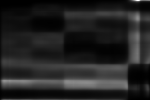

In [5]:
import net.imagej.ops.deconvolve.RichardsonLucyF
base_deconvoled_big_iterate = ij.op().run(RichardsonLucyF.class,convolved_big,kernel_big,50)

In order to better dealing with edges, we can try to use non-circulant mode. With the same 50 iterations, the result shown below is apparently better than the one above

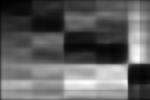

In [6]:
import net.imagej.ops.deconvolve.RichardsonLucyF
base_deconvolved_big_noncirc = ij.op().run(RichardsonLucyF.class, convolved_big, kernel_big, null, null,null, null,null,50,true,false )

What if the iterations take too long? In that case, we can try to minimize the time we spend by taking larger steps, hence saving the time by using accelerated algorithms. 

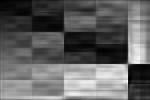

In [7]:
import net.imagej.ops.deconvolve.RichardsonLucyF
base_deconvolved_big_acc_noncirc = ij.op().run(RichardsonLucyF.class, convolved_big, kernel_big, null, null,null, null, null,50,true,true)

### Fourier transforms

Fourier transform is very easy to use in ImageJ. With FFT ops, one can take an image as input and get result easily.

In [8]:
import net.imglib2.type.numeric.real.FloatType

// create image
fft_in = ij.op().run("create.img", [150, 100], new FloatType())
formula = "p[0]^2 + p[1]"
ij.op().image().equation(fft_in, formula)

// apply fft
fft_out = ij.op().run("filter.fft", fft_in)
["original image" , fft_in]

original image <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAARsUlEQVR42sWcVQ8Y1BKED+7uENzdIbi7F4K7OwR3Ky7BHVq8ELTFpcUJ7u4Q3N1hbuZh7sMmJ/uwD3N+w+TL5DubaSOPPDJGGWUUtNYw0kgjYfTRR8cYY4yBUUcdFaONNhrGHntsjDPOOBhzzDEx1lhjYfzxx8cEE0yAcccdF+ONNx4mnnhiTDLJJJhwwgkx0UQTYfLJJ8cUU0yBSSedFJNNNhmmnnpqTDPNNJhyyikx1VRTYfrpp8cMM8yAaaedFtNNNx1mnnlmzDLLLJhxxhkx00wzYfbZZ8ccc8yBWWedFbPNNhvmnntuzDPPPJhzzjkx11xzYf7558cCCyyAeeedF/PNNx8WXnhhLLLIIlhwwQWx0EILYfHFF8cSSyyBRRddFIstthiWXnppLLPMMlhyySWx1FJLYfnll8cKK6yAZZddFssttxxWXnllrLLKKlhxxRWx0korYfXVV8caa6yBVVddFautthrWXnttrLPOOlhzzTWx1lprYf3118cGG2yAddddF+uttx422mgjbLzxxhgwYAA23HBDbLbZZth8882xySabYNNNN8VWW22FrbfeGltssQW23HJLbLfddth+++2xzTbbYNttt8VOO+2EnXfeGTvssAN23HFH7Lbbbth9992xyy67YNddd8Vee+2FvffeG3vssQf23HNP7Lfffth///2xzz77YN9998VBBx2Egw8+GAcccAAOPPBAHHbYYTj88MNxyCGH4NBDD8VRRx2Fo48+GkcccQSOPPJIHHfccRg4cCCOOeYYHHvssTjxxBNx0kkn4fjjj8cJJ5yAU089FaeddhpOPvlknHLKKTjzzDNx1lln4fTTT8cZZ5yBc889F+eddx7OPvtsnHPOObjwwgtx0UUX4fzzz8cFF1yASy+9FJdddhkaQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDWRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RLKLL74Yl1xyyf9JJXI1kUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQyhorhEqlErhY7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFziVSiVzqXC12qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnUukErnUuVrsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO9nll1+OQYMGYfDgwbjiiitw5ZVX4qqrrkKLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YidjqBguhorhYqgYrpZ5qsxzZZ4q81yZp8o8V+apMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHOJVCLX1VdfjWuuuQYt81SZ58o8Vea5Mk+Vea7MU2WeK/NUmefKPFXmuTJPlXmuzFNlnivzVJnnEqlELoaK4WqZp8o8V+apMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHNlnirzXJmnyjyXOpVIJXK1zFNlnivzVJnnyjxV5rkyT5V5rsxTZZ4r81SZ58o8Vea5Mk+Vea7MU2WeS51KpBK5WuapMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHNlnirzXJmnyjxX5qkyzyVSiVzqXC3zVJnnyjxV5rkyT5V5rsxTZZ4r81SZ58o8Vea5Mk+Vea7MU2WeK/NUmecSqUQuda6WeabMU2WeK/NkmWfKPFXmuTJPlnmmzFNlnivzZJlnyjxV5rkyT6a/PRnz+PfX81QiVc9ztcwzZZ4q81yZJ8s8U+apMs+VebLMM2WeKvNcmSfLPFPmqTLPlXky/e3JmMe/v56nEql6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec/XuqUSunqcSuXqeq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5z9e6pRK6epxK5ep6rVe+pqvdc1Xuq6j1X9Z6qes9Vvaeq3nP17qlEsp6nEsl6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec/XuqUSynqcSyXqeq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5z9e6pRK6epxK5ep6rVe+pqvdc1Xuq6j1X9Z6qes9Vvaeq3nP17qlErp6nErl6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec2WeKvNcvXuuVr2nqt5zVe+pqvdc1Xuq6j1X9Z6qes+VearMc/XuuVr1nqp6z1W9p6rec1Xvqar3XNV7quo9V+apMs/Vu+dq1Xuq6j1X9Z6qes9Vvaeq3nNV76mq91yZp8o8V++eq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5zZZ4q81y9e65Wvaeq3nNV76mq91zVe6rqPVf1nqp6z5V5qsxz9e65WvWeqnrPVb2nqt5zVe+pqvdc1Xuq6j1X5qkyz9W752rVe6rqPVf1nqp6z1W9p6rec1Xvqar3XJmnyjxX756rVe+ZqvdU1Xuu6j1Z9Z6pek9Vveeq3pNde+21uO666zBkyBBcf/31uOGGG3DjjTfipptuws0334xbbrkFt956K2677TYMHToUw4YNw+2334477rgDd955J+666y7cfffduOeee3Dvvffivvvuw/33349WvWeq3lNV77mq92TVe6bqPVX1nqt6T8ZQMVwMFcPFUDFcDBXDxVAxXAwVw8VQMVwMFcPFUDFcDBXDxVAxXM29T+Xe53LvU7n3uUQqkUukErlEKpFLpBK5RCqR64EHHsDw4cPR3PtU7n0u9z6Ve59LpBK5RCqRS6QSuUQqkUukErkYKoarufep3Ptc7n0q9z5X7FSxc8VOFTuXOpVIJXI19z6Ve5/LvU/l3ueKnSp2rtipYudSpxKpRK7m3qdy73O596nc+1yxU8XOFTtV7FwilcilztXc+1TufS73PpV7nyt2qti5YqeKnUukErnUuZp7n8q9z+Xep3Lvc2WeKvNcI0aMwIMPPoiHHnoIDz/8MB555BE8+uijaO59Kvc+l3ufyr3PlXmqzHMxVAwXQ8VwMVQMV3PvU7n3udz7VO59rsxTZZ5LpBK5HnvsMTz++ONo7n0q9z6Xe5/Kvc+VearMc4lUIhdD

The usage of Inverse FFT is very similar to FFT. Here we are going to invert the result we got from the above example. The result is the same as the original image.

In [9]:
import net.imglib2.type.numeric.real.FloatType

inverted = ij.op().run("create.img", [150,100], new FloatType())
ij.op().filter().ifft(inverted, fft_out)
[["Inverted image": inverted]]

Inverted image <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAARsUlEQVR42sWcVQ8Y1BKED+7uENzdIbi7F4K7OwR3Ky7BHVq8ELTFpcUJ7u4Q3N1hbuZh7sMmJ/uwD3N+w+TL5DubaSOPPDJGGWUUtNYw0kgjYfTRR8cYY4yBUUcdFaONNhrGHntsjDPOOBhzzDEx1lhjYfzxx8cEE0yAcccdF+ONNx4mnnhiTDLJJJhwwgkx0UQTYfLJJ8cUU0yBSSedFJNNNhmmnnpqTDPNNJhyyikx1VRTYfrpp8cMM8yAaaedFtNNNx1mnnlmzDLLLJhxxhkx00wzYfbZZ8ccc8yBWWedFbPNNhvmnntuzDPPPJhzzjkx11xzYf7558cCCyyAeeedF/PNNx8WXnhhLLLIIlhwwQWx0EILYfHFF8cSSyyBRRddFIstthiWXnppLLPMMlhyySWx1FJLYfnll8cKK6yAZZddFssttxxWXnllrLLKKlhxxRWx0korYfXVV8caa6yBVVddFautthrWXnttrLPOOlhzzTWx1lprYf3118cGG2yAddddF+uttx422mgjbLzxxhgwYAA23HBDbLbZZth8882xySabYNNNN8VWW22FrbfeGltssQW23HJLbLfddth+++2xzTbbYNttt8VOO+2EnXfeGTvssAN23HFH7Lbbbth9992xyy67YNddd8Vee+2FvffeG3vssQf23HNP7Lfffth///2xzz77YN9998VBBx2Egw8+GAcccAAOPPBAHHbYYTj88MNxyCGH4NBDD8VRRx2Fo48+GkcccQSOPPJIHHfccRg4cCCOOeYYHHvssTjxxBNx0kkn4fjjj8cJJ5yAU089FaeddhpOPvlknHLKKTjzzDNx1lln4fTTT8cZZ5yBc889F+eddx7OPvtsnHPOObjwwgtx0UUX4fzzz8cFF1yASy+9FJdddhkaQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDFUDBdDxXAxVAwXQ8VwMVQMF0PFcDWRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RLKLL74Yl1xyyf9JJXI1kUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQykUmkErlEMpFJpBK5RDKRSaQSuUQyhorhEqlErhY7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFzhU7VexcsVPFziVSiVzqXC12qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnSt2qti5YqeKnUukErnUuVrsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO1nsTLFTxc4VO9nll1+OQYMGYfDgwbjiiitw5ZVX4qqrrkKLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YieLnSl2qti5YidjqBguhorhYqgYrpZ5qsxzZZ4q81yZp8o8V+apMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHOJVCLX1VdfjWuuuQYt81SZ58o8Vea5Mk+Vea7MU2WeK/NUmefKPFXmuTJPlXmuzFNlnivzVJnnEqlELoaK4WqZp8o8V+apMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHNlnirzXJmnyjyXOpVIJXK1zFNlnivzVJnnyjxV5rkyT5V5rsxTZZ4r81SZ58o8Vea5Mk+Vea7MU2WeS51KpBK5WuapMs+VearMc2WeKvNcmafKPFfmqTLPlXmqzHNlnirzXJmnyjxX5qkyzyVSiVzqXC3zVJnnyjxV5rkyT5V5rsxTZZ4r81SZ58o8Vea5Mk+Vea7MU2WeK/NUmecSqUQuda6WeabMU2WeK/NkmWfKPFXmuTJPlnmmzFNlnivzZJlnyjxV5rkyT6a/PRnz+PfX81QiVc9ztcwzZZ4q81yZJ8s8U+apMs+VebLMM2WeKvNcmSfLPFPmqTLPlXky/e3JmMe/v56nEql6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec/XuqUSunqcSuXqeq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5z9e6pRK6epxK5ep6rVe+pqvdc1Xuq6j1X9Z6qes9Vvaeq3nP17qlEsp6nEsl6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec/XuqUSynqcSyXqeq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5z9e6pRK6epxK5ep6rVe+pqvdc1Xuq6j1X9Z6qes9Vvaeq3nP17qlErp6nErl6nqtV76mq91zVe6rqPVf1nqp6z1W9p6rec2WeKvNcvXuuVr2nqt5zVe+pqvdc1Xuq6j1X9Z6qes+VearMc/XuuVr1nqp6z1W9p6rec1Xvqar3XNV7quo9V+apMs/Vu+dq1Xuq6j1X9Z6qes9Vvaeq3nNV76mq91yZp8o8V++eq1Xvqar3XNV7quo9V/WeqnrPVb2nqt5zZZ4q81y9e65Wvaeq3nNV76mq91zVe6rqPVf1nqp6z5V5qsxz9e65WvWeqnrPVb2nqt5zVe+pqvdc1Xuq6j1X5qkyz9W752rVe6rqPVf1nqp6z1W9p6rec1Xvqar3XJmnyjxX756rVe+ZqvdU1Xuu6j1Z9Z6pek9Vveeq3pNde+21uO666zBkyBBcf/31uOGGG3DjjTfipptuws0334xbbrkFt956K2677TYMHToUw4YNw+2334477rgDd955J+666y7cfffduOeee3Dvvffivvvuw/33349WvWeq3lNV77mq92TVe6bqPVX1nqt6T8ZQMVwMFcPFUDFcDBXDxVAxXAwVw8VQMVwMFcPFUDFcDBXDxVAxXM29T+Xe53LvU7n3uUQqkUukErlEKpFLpBK5RCqR64EHHsDw4cPR3PtU7n0u9z6Ve59LpBK5RCqRS6QSuUQqkUukErkYKoarufep3Ptc7n0q9z5X7FSxc8VOFTuXOpVIJXI19z6Ve5/LvU/l3ueKnSp2rtipYudSpxKpRK7m3qdy73O596nc+1yxU8XOFTtV7FwilcilztXc+1TufS73PpV7nyt2qti5YqeKnUukErnUuZp7n8q9z+Xep3Lvc2WeKvNcI0aMwIMPPoiHHnoIDz/8MB555BE8+uijaO59Kvc+l3ufyr3PlXmqzHMxVAwXQ8VwMVQMV3PvU7n3udz7VO59rsxTZZ5LpBK5HnvsMTz++ONo7n0q9z6Xe5/Kvc+VearMc4lUIhdD